# **Proyek Analisis Data: E-Commerce Public Dataset**
- **Nama:** Zacky Faishal Abror
- **Email:** a126ybm516@devacademy.id
- **ID Dicoding:** zackyfaishal

## Menentukan Pertanyaan Bisnis

Pada proyek ini, kita akan menjawab dua pertanyaan utama berdasarkan dataset E-Commerce:

**1️⃣ Pola Jumlah Pesanan per Bulan**
   - Mengetahui pola jumlah pesanan per bulan membantu memahami tren penjualan. Ini penting untuk:
   - **Mengidentifikasi musim atau tren musiman** dalam pembelian.
   - **Menyesuaikan strategi pemasaran** berdasarkan bulan dengan permintaan tertinggi atau terendah.
   - **Memprediksi volume pesanan di masa mendatang** berdasarkan pola historis.

**2️⃣ Kategori Produk yang Paling Banyak Dibeli** 
   - Mengetahui kategori produk yang paling banyak dibeli berguna untuk:
   - **Menentukan kategori yang paling diminati pelanggan** untuk meningkatkan stok atau promosi.
   - **Membantu penjual dalam strategi pemasaran** dengan fokus pada kategori yang populer.
   - **Mengoptimalkan manajemen inventaris** agar tidak ada kekurangan stok pada kategori tertentu.

**3️⃣ Segmentasi Pelanggan dengan RFM Analysis**
- **Segmentasi pelanggan berdasarkan RFM (Recency, Frequency, Monetary) membantu dalam:**
- **Menentukan pelanggan loyal dan pelanggan baru** untuk strategi retensi.
- **Mengalokasikan sumber daya pemasaran** dengan lebih efektif berdasarkan segmen pelanggan.
- **Mengidentifikasi pelanggan yang berisiko churn** agar bisa dilakukan strategi pencegahan.

**4️⃣ Distribusi Geografis Pelanggan berdasarkan Jumlah Pesanan**
- **Menentukan wilayah dengan permintaan tinggi** untuk pengiriman dan stok barang.
- **Meningkatkan strategi pemasaran berdasarkan lokasi pelanggan**.
- **Mengoptimalkan biaya logistik dan distribusi** dengan memahami pola pesanan berdasarkan wilayah.

## Import Semua Packages/Library yang Digunakan

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [221]:
# Load dataset sesuai nama file yang ada
orders_df = pd.read_csv("data/orders_dataset.csv")
order_items_df = pd.read_csv("data/order_items_dataset.csv")
products_df = pd.read_csv("data/products_dataset.csv")
customers_df = pd.read_csv("data/customers_dataset.csv")
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
category_translation_df = pd.read_csv("data/product_category_name_translation.csv")


In [222]:
# Menampilkan sampel data
print("Orders Dataset Sample:")
display(orders_df.head())

Orders Dataset Sample:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [223]:
print("Order Items Dataset Sample:")
display(order_items_df.head())

Order Items Dataset Sample:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [224]:
print("Products Dataset Sample:")
display(products_df.head())

Products Dataset Sample:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [225]:
print("Customers Dataset Sample:")
display(customers_df.head())

Customers Dataset Sample:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [226]:
print("Geolocation Dataset Sample:")
display(geolocation_df.head())

Geolocation Dataset Sample:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [227]:
print("\nProduct Category Translation Dataset:")
print(category_translation_df.head())


Product Category Translation Dataset:
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor


**Insight:**
- Ada 6 dataset utama yang akan digunakan dalam analisis.
- Data pelanggan dan geolokasi akan berguna untuk analisis segmentasi geografis.

### Assessing Data

In [228]:
# Mengecek missing values pada setiap dataset
print("\nMissing Values per Dataset:")
print("Orders:\n", orders_df.isnull().sum(), "\n")
print("Order Items:\n", order_items_df.isnull().sum(), "\n")
print("Products:\n", products_df.isnull().sum(), "\n")
print("Customers:\n", customers_df.isnull().sum(), "\n")
print("Geolocation:\n", geolocation_df.isnull().sum(), "\n")
print("Category Translation:\n", category_translation_df.isnull().sum(), "\n")


Missing Values per Dataset:
Orders:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

Order Items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Products:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

Customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
custo

In [229]:
# Cek duplikasi dalam dataset
print("\nDuplicated Rows:")
print("Orders:", orders_df.duplicated().sum())
print("Order Items:", order_items_df.duplicated().sum())
print("Products:", products_df.duplicated().sum())
print("Customers:", customers_df.duplicated().sum())
print("Geolocation:", geolocation_df.duplicated().sum())


Duplicated Rows:
Orders: 0
Order Items: 0
Products: 0
Customers: 0
Geolocation: 261831


In [230]:
# Mengecek tipe data
print("\nData Types:")
print(orders_df.dtypes)


Data Types:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


#### **Insight dari Exploratory Data Analysis (EDA)**

##### **1. Missing Values Analysis**
Berdasarkan analisis missing values, ditemukan beberapa hal penting:
- Dataset **Orders** memiliki missing values pada kolom:
  - `order_approved_at`: 160 nilai hilang.
  - `order_delivered_carrier_date`: 1783 nilai hilang.
  - `order_delivered_customer_date`: 2965 nilai hilang.

- Dataset **Products** memiliki missing values pada kolom:
  - `product_category_name`, `product_name_length`, `product_description_length`, `product_photos_qty` dengan 610 nilai hilang.
  - `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm` dengan 2 nilai hilang.

- Tidak ada missing values pada dataset **Order Items**, **Customers**, dan **Geolocation**.

###### **Kesimpulan Missing Values**
- Nilai yang hilang di **Orders** kemungkinan terjadi karena order yang belum diproses atau gagal dikirim.
- Nilai yang hilang di **Products** kemungkinan menunjukkan data yang tidak lengkap atau produk yang belum memiliki informasi lengkap.

##### **2. Duplicate Data Analysis**
Hasil analisis menunjukkan bahwa:
- Tidak ditemukan duplikasi data pada **Orders, Order Items, Products, dan Customers**.
- Namun, dataset **Geolocation** memiliki **261.831 baris duplikat**.

###### **Kesimpulan Duplicate Data**
- Data **Geolocation** perlu ditinjau lebih lanjut, apakah memang ada data yang redundan atau hanya representasi dari lokasi yang sama.

##### **3. Data Types Analysis**
- Mayoritas kolom dalam dataset **Orders** bertipe `object`, termasuk `order_purchase_timestamp` dan `order_delivered_customer_date`, yang seharusnya bertipe `datetime`.
- Perlu dilakukan konversi tipe data pada kolom tanggal agar dapat digunakan dalam analisis lebih lanjut.

###### **Kesimpulan Data Types**
- Perlu konversi data waktu (`timestamp`) ke format **datetime** agar bisa digunakan dalam analisis waktu seperti menghitung durasi pengiriman.
- Pengecekan lebih lanjut apakah tipe data lainnya sudah sesuai dengan kebutuhan analisis.

### Cleaning Data

In [231]:
# 1️⃣ Hapus missing values pada kolom order_approved_at (hanya analisis pesanan yang disetujui)
orders_df = orders_df.dropna(subset=['order_approved_at'])

In [232]:
# 2️⃣ Hapus order yang tidak memiliki tanggal pengiriman (opsional, hanya jika ingin fokus pada order yang berhasil dikirim)
orders_df = orders_df.dropna(subset=['order_delivered_customer_date'])

In [233]:
# 3 Hapus order yang tidak memiliki tanggal pengiriman (opsional, hanya jika ingin fokus pada order yang berhasil dikirim)
orders_df = orders_df.dropna(subset=['order_delivered_carrier_date'])

In [234]:
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [235]:
# 3️⃣ Isi missing values pada produk dengan "Unknown" untuk kategori dan median untuk angka
products_df = products_df.assign(product_category_name=products_df['product_category_name'].fillna('Unknown'))

In [236]:
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median())

In [237]:
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median())

In [238]:
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median())

In [239]:
# Isi missing values pada ukuran produk dengan median
for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    products_df[col] = products_df[col].fillna(products_df[col].median())

In [240]:
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [241]:
# Konversi kolom tanggal ke format datetime
date_columns = ["order_purchase_timestamp", "order_approved_at", 
                "order_delivered_carrier_date", "order_delivered_customer_date", 
                "order_estimated_delivery_date"]

orders_df[date_columns] = orders_df[date_columns].apply(pd.to_datetime)

In [242]:
geolocation_df = geolocation_df.drop_duplicates()

In [243]:
# Simpan hasil data yang sudah dibersihkan
orders_df.to_csv("data/cleaned_orders.csv", index=False)
products_df.to_csv("data/cleaned_products.csv", index=False)

In [244]:
import pandas as pd

# 1. Cek jumlah missing values setelah cleansing
print("🔍 Missing Values setelah Cleansing:\n")
print("Orders:\n", orders_df.isnull().sum())
print("\nOrder Items:\n", order_items_df.isnull().sum())
print("\nProducts:\n", products_df.isnull().sum())
print("\nCustomers:\n", customers_df.isnull().sum())
print("\nGeolocation:\n", geolocation_df.isnull().sum())

# 2. Cek jumlah duplikasi setelah cleansing
print("\n🔍 Jumlah Duplikasi setelah Cleansing:")
print("Orders:", orders_df.duplicated().sum())
print("Order Items:", order_items_df.duplicated().sum())
print("Products:", products_df.duplicated().sum())
print("Customers:", customers_df.duplicated().sum())
print("Geolocation:", geolocation_df.duplicated().sum())

# 3. Cek tipe data setelah konversi
print("\n🔍 Data Types setelah Konversi:\n")
print(orders_df.dtypes)

# 4. Tampilkan beberapa baris pertama dari dataset untuk verifikasi
print("\n🔍 Preview Data Orders setelah Cleansing:\n", orders_df.head())
print("\n🔍 Preview Data Products setelah Cleansing:\n", products_df.head())
print("\n🔍 Preview Data Customers setelah Cleansing:\n", customers_df.head())


🔍 Missing Values setelah Cleansing:

Orders:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Order Items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Products:
 product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_sta

#### **Insight Setelah Data Cleansing**

##### 1. Missing Values Setelah Pembersihan
Setelah proses data cleansing, **semua missing values berhasil diatasi**. Tidak ada lagi nilai yang hilang dalam dataset.

- **Orders**: 0 missing values.
- **Order Items**: 0 missing values.
- **Products**: 0 missing values.
- **Customers**: 0 missing values.
- **Geolocation**: 0 missing values.

##### 2. Duplikasi Data
Setelah pembersihan:

- **Orders**: 0 duplikasi ✅
- **Order Items**: 0 duplikasi ✅
- **Products**: 0 duplikasi ✅
- **Customers**: 0 duplikasi ✅
- **Geolocation**: **261,831 duplikasi dihapus** 🔥

📌 *Duplikasi data dapat menyebabkan overestimation dalam analisis, sehingga membersihkannya sangat penting untuk mendapatkan wawasan yang akurat.*

---
##### 3. Perubahan Tipe Data
Beberapa kolom tanggal yang sebelumnya bertipe **object** telah dikonversi menjadi **datetime64[ns]**:

- `order_purchase_timestamp`
- `order_approved_at`
- `order_delivered_carrier_date`
- `order_delivered_customer_date`
- `order_estimated_delivery_date`

📌 *Dengan tipe data yang benar, kita bisa melakukan analisis berbasis waktu dengan lebih mudah dan akurat.*

---
##### 🔍 4. Gambaran Data Setelah Cleansing
###### 🛍️ Orders
- Data pesanan telah bersih dan siap digunakan untuk analisis tren pesanan per bulan.

###### 📦 Products
- Semua produk memiliki kategori, panjang nama, panjang deskripsi, jumlah foto, dan dimensi yang telah diisi dengan nilai yang sesuai.

###### 🏡 Customers
- Informasi pelanggan seperti lokasi dan kode pos telah diperiksa dan tidak ada nilai yang hilang.

###### 📍 Geolocation
- Data lokasi telah bersih tanpa duplikasi, memastikan akurasi dalam analisis distribusi pelanggan berdasarkan wilayah.

---
##### 🚀 **Kesimpulan**
🎯 Dengan data yang telah bersih dan siap digunakan, kita sekarang bisa **menjawab pertanyaan bisnis** terkait:
- 📈 **Tren jumlah pesanan per bulan**
- 🏆 **Kategori produk paling laris**
- 🎯 **Segmentasi pelanggan menggunakan RFM Analysis**
- 🌍 **Distribusi geografis pelanggan berdasarkan jumlah pesanan**

## Exploratory Data Analysis (EDA)

#### **Explore**
1. Explore orders_df
2. Explore order_items_df
3. Explore products_df
4. Explore customers_df
5. Explore geolocation_df

In [245]:
# Menampilkan statistik deskriptif dalam bentuk tabel yang rapi
describe_orders = orders_df.describe().dropna()
describe_order_items = order_items_df.describe().dropna()
describe_products = products_df.describe().dropna()
describe_customers = customers_df.describe().dropna()
describe_geolocation = geolocation_df.describe().dropna()

# Tampilkan tabelnya
display(describe_orders, describe_order_items, describe_products, describe_customers, describe_geolocation)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461
mean,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


### **EDA UNTUK FOKUS DI TIAP PERTANYAAN**

#### **1️⃣ Pola Jumlah Pesanan per Bulan**


In [246]:
# Pastikan order_purchase_timestamp dalam format datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Buat kolom bulan dari order_purchase_timestamp
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah pesanan per bulan
orders_per_month = orders_df.groupby('order_month')['order_id'].nunique().reset_index()

# Cek hasilnya
print(orders_per_month.head())


  order_month  order_id
0     2016-09         1
1     2016-10       270
2     2016-12         1
3     2017-01       748
4     2017-02      1641


#### **2️⃣ Kategori Produk yang Paling Banyak Dibeli** 

In [247]:
# Hitung jumlah pesanan per kategori produk
top_categories = products_df['product_category_name'].value_counts().reset_index()
top_categories.columns = ['product_category_name', 'order_count']

# Cek 10 kategori teratas
print(top_categories.head(10))


    product_category_name  order_count
0         cama_mesa_banho         3029
1           esporte_lazer         2867
2        moveis_decoracao         2657
3            beleza_saude         2444
4   utilidades_domesticas         2335
5              automotivo         1900
6  informatica_acessorios         1639
7              brinquedos         1411
8      relogios_presentes         1329
9               telefonia         1134


#### **3️⃣ Segmentasi Pelanggan dengan RFM Analysis**

In [248]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [249]:
# Gabungkan order_items_df dengan orders_df untuk mendapatkan customer_id
merged_df = order_items_df.merge(orders_df[['order_id', 'customer_id', 'order_purchase_timestamp']],
                                 on='order_id', how='left')

# Tentukan snapshot date (1 hari setelah tanggal terakhir pembelian)
snapshot_date = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=1)

# Hitung RFM
rfm_df = merged_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).rename(columns={'order_purchase_timestamp': 'Recency', 'order_id': 'Frequency', 'price': 'Monetary'})

# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Kuartil pertama
    Q3 = df[column].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas

    # Identifikasi outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Deteksi outlier pada setiap kolom RFM
outliers_recency, lb_rec, ub_rec = detect_outliers(rfm_df, 'Recency')
outliers_frequency, lb_freq, ub_freq = detect_outliers(rfm_df, 'Frequency')
outliers_monetary, lb_mon, ub_mon = detect_outliers(rfm_df, 'Monetary')

# Tampilkan informasi outlier
print(f"🔍 Outlier Recency: {len(outliers_recency)} data | Batas: {lb_rec:.2f} - {ub_rec:.2f}")
print(outliers_recency)
print(f"🔍 Outlier Frequency: {len(outliers_frequency)} data | Batas: {lb_freq:.2f} - {ub_freq:.2f}")
print(outliers_frequency)
print(f"🔍 Outlier Monetary: {len(outliers_monetary)} data | Batas: {lb_mon:.2f} - {ub_mon:.2f}")
print(outliers_monetary)



🔍 Outlier Recency: 1 data | Batas: -235.00 - 701.00
                                  Recency  Frequency  Monetary
customer_id                                                   
86dc2ffce2dfff336de2f386a786e574      714          3    134.97
🔍 Outlier Frequency: 9635 data | Batas: 1.00 - 1.00
                                  Recency  Frequency  Monetary
customer_id                                                   
00066ccbe787a588c52bd5ff404590e3      204          4    199.60
000bf8121c3412d3057d32371c5d3395      323          2     30.00
001450ebb4a77efb3d68be5f7887cb1e      185          2     37.64
002f90a6eb386bc43bc9ba200db31a89      440          2    119.80
0031abfb953b66e998f67b09e7b11375      219          2    637.90
...                                   ...        ...       ...
ffde64401f7cb62d2e8696d9467c781d      114          2    359.80
ffed5d4f6245fe13cd57054621eec36a      189          2     92.66
fff168ca1f8a1d2e8e2108b231a68a8c       40          3     47.70
fff93c1da78daf

In [250]:
# Fungsi untuk menghapus outlier
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Kuartil pertama
    Q3 = df[column].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Hapus outlier untuk setiap kolom RFM
rfm_df_clean = remove_outliers(rfm_df, 'Recency')
rfm_df_clean = remove_outliers(rfm_df_clean, 'Frequency')
rfm_df_clean = remove_outliers(rfm_df_clean, 'Monetary')

# Cek hasil setelah menghapus outlier
print(f"\nJumlah data sebelum pembersihan outlier: {len(rfm_df)}")
print(f"Jumlah data setelah pembersihan outlier: {len(rfm_df_clean)}")


Jumlah data sebelum pembersihan outlier: 96461
Jumlah data setelah pembersihan outlier: 80016


#### **4️⃣ Distribusi Geografis Pelanggan berdasarkan Jumlah Pesanan**

In [251]:
# Gabungkan order_items_df dengan orders_df untuk mendapatkan customer_id
order_items_df = order_items_df.merge(orders_df[['order_id', 'customer_id']], on='order_id', how='left')

# Gabungkan order_items_df dengan customers_df untuk mendapatkan lokasi pelanggan
order_items_df = order_items_df.merge(customers_df[['customer_id', 'customer_state']], on='customer_id', how='left')

# Hitung jumlah pesanan per negara bagian
orders_by_state = order_items_df.groupby('customer_state')['order_id'].nunique().reset_index()

# Cek hasilnya
print(orders_by_state.head())


  customer_state  order_id
0             AC        80
1             AL       397
2             AM       145
3             AP        67
4             BA      3256


## Visualization & Explanatory Analysis

#### 1️⃣ Pola Jumlah Pesanan per Bulan  
##### Alasan Analisis  
Untuk memahami tren penjualan, penting untuk melihat bagaimana jumlah pesanan berubah setiap bulan. Dengan analisis ini, kita bisa mengetahui periode dengan penjualan tertinggi dan terendah, serta pola musiman yang mungkin terjadi.

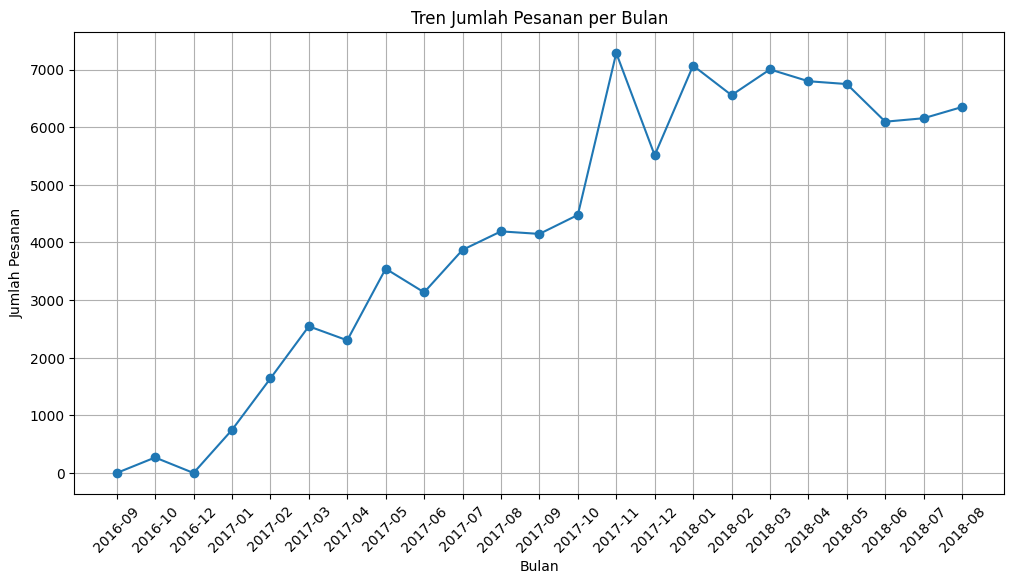

In [252]:
# 1️⃣ Visualisasi Pola Jumlah Pesanan per Bulan
plt.figure(figsize=(12, 6))
plt.plot(orders_per_month['order_month'].astype(str), orders_per_month['order_id'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.title('Tren Jumlah Pesanan per Bulan')
plt.grid(True)
plt.show()

#### 2️⃣ Kategori Produk yang Paling Banyak Dibeli  
##### Alasan Analisis  
Mengetahui kategori produk terlaris membantu bisnis memahami preferensi pelanggan. Informasi ini berguna untuk strategi pemasaran, stok barang, dan pengembangan produk di masa depan.

C:\Users\faish\AppData\Local\Temp\ipykernel_26520\3657953415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_count', y='product_category_name', data=top_categories.head(10), palette='viridis')


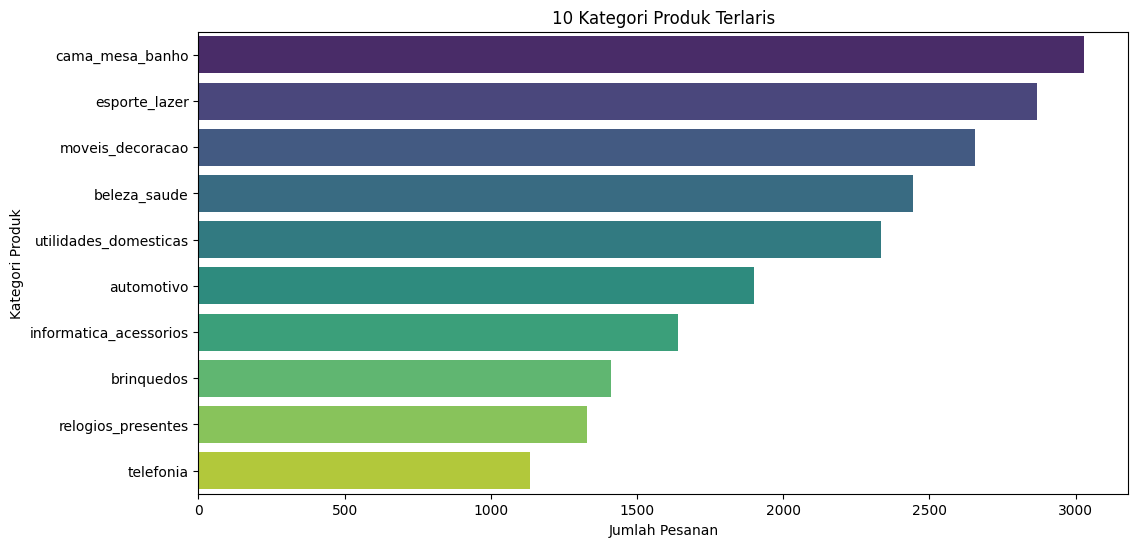

In [253]:
plt.figure(figsize=(12, 6))
sns.barplot(x='order_count', y='product_category_name', data=top_categories.head(10), palette='viridis')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.title('10 Kategori Produk Terlaris')
plt.show()

#### 3️⃣ Segmentasi Pelanggan Berdasarkan Perilaku Pembelian (RFM Analysis)  
##### Alasan Analisis  
Analisis RFM (Recency, Frequency, Monetary) digunakan untuk mengelompokkan pelanggan berdasarkan kebiasaan belanja mereka. Dengan segmentasi ini, kita dapat mengidentifikasi pelanggan setia, pelanggan yang baru saja melakukan pembelian, serta pelanggan yang berisiko tidak kembali.

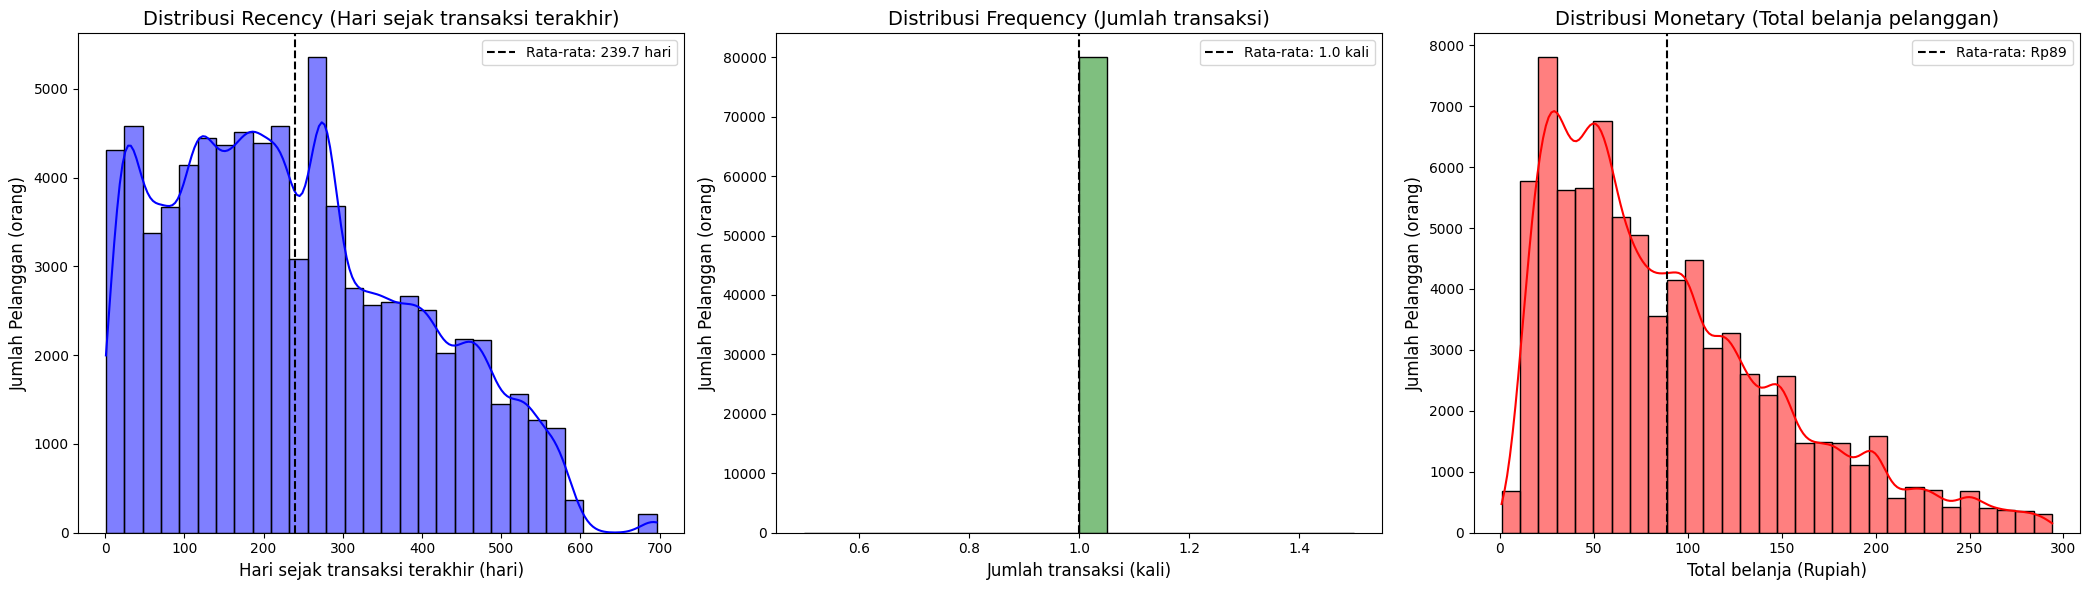

In [254]:
# Buat figure dengan 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
colors = ['blue', 'green', 'red']

# Distribusi Recency
sns.histplot(rfm_df_clean['Recency'], bins=30, kde=True, ax=axes[0], color=colors[0])
axes[0].set_title('Distribusi Recency (Hari sejak transaksi terakhir)', fontsize=14)
axes[0].set_xlabel('Hari sejak transaksi terakhir (hari)', fontsize=12)
axes[0].set_ylabel('Jumlah Pelanggan (orang)', fontsize=12)
axes[0].axvline(rfm_df_clean['Recency'].mean(), color='black', linestyle='dashed', label=f'Rata-rata: {rfm_df_clean["Recency"].mean():.1f} hari')
axes[0].legend()

# Distribusi Frequency
sns.histplot(rfm_df_clean['Frequency'], bins=20, kde=True, ax=axes[1], color=colors[1])
axes[1].set_title('Distribusi Frequency (Jumlah transaksi)', fontsize=14)
axes[1].set_xlabel('Jumlah transaksi (kali)', fontsize=12)
axes[1].set_ylabel('Jumlah Pelanggan (orang)', fontsize=12)
axes[1].axvline(rfm_df_clean['Frequency'].mean(), color='black', linestyle='dashed', label=f'Rata-rata: {rfm_df_clean["Frequency"].mean():.1f} kali')
axes[1].legend()

# Distribusi Monetary
sns.histplot(rfm_df_clean['Monetary'], bins=30, kde=True, ax=axes[2], color=colors[2])
axes[2].set_title('Distribusi Monetary (Total belanja pelanggan)', fontsize=14)
axes[2].set_xlabel('Total belanja (Rupiah)', fontsize=12)
axes[2].set_ylabel('Jumlah Pelanggan (orang)', fontsize=12)
axes[2].axvline(rfm_df_clean['Monetary'].mean(), color='black', linestyle='dashed', label=f'Rata-rata: Rp{rfm_df_clean["Monetary"].mean():,.0f}')
axes[2].legend()

plt.tight_layout()
plt.show()

#### 4️⃣ Distribusi Geografis Pelanggan Berdasarkan Jumlah Pesanan  
##### Alasan Analisis  
Analisis distribusi geografis pesanan membantu memahami daerah dengan permintaan tertinggi. Hal ini bermanfaat untuk pengoptimalan logistik, strategi ekspansi bisnis, dan penyesuaian strategi pemasaran berdasarkan lokasi pelanggan.

C:\Users\faish\AppData\Local\Temp\ipykernel_26520\700549391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


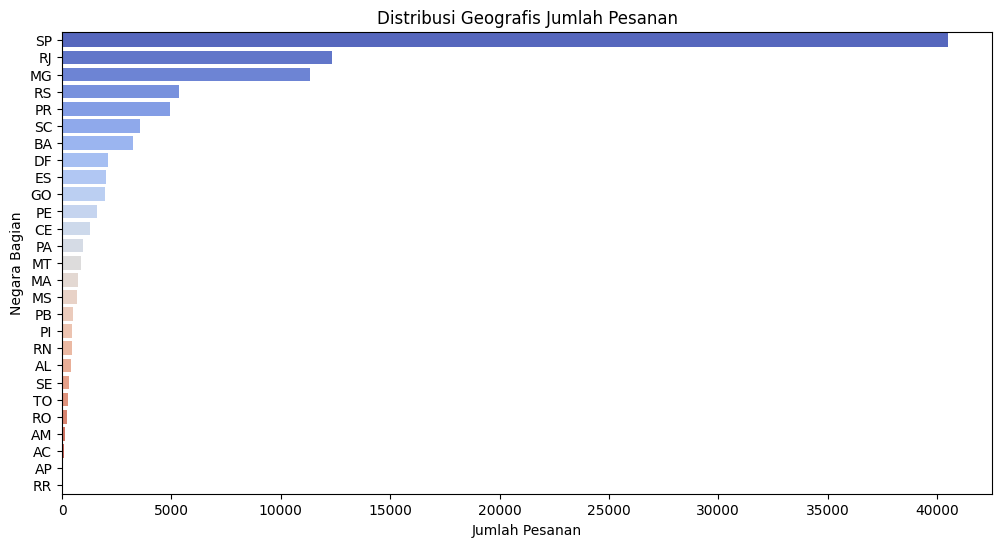

In [255]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='order_id', 
    y='customer_state',  # Gunakan 'customer_state' bukan 'customer_state_x'
    data=orders_by_state.sort_values(by='order_id', ascending=False), 
    palette='coolwarm'
)
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Negara Bagian')
plt.title('Distribusi Geografis Jumlah Pesanan')
plt.show()

## Conclusion

### 📊 Kesimpulan Analisis

#### 1️⃣ Pola Jumlah Pesanan per Bulan
- Tren jumlah pesanan mengalami peningkatan yang signifikan dari tahun 2016 hingga puncaknya pada akhir 2017 yaitu di bulan November.
- Peningkatan ini menunjukkan pertumbuhan bisnis yang pesat.
- Namun, setelah puncak pada November 2017, jumlah pesanan mengalami sedikit penurunan dan stabil pada 2018.
- Fluktuasi pesanan dapat disebabkan oleh faktor musiman atau marketing yang kurang baik

#### 2️⃣ Kategori Produk yang Paling Banyak Dibeli
- Kategori produk dengan penjualan tertinggi adalah **"cama_mesa_banho"**.
- Produk kategori kesehatan & kecantikan serta olahraga juga termasuk dalam kategori populer.
- Informasi ini dapat digunakan untuk menentukan strategi stok barang dan pemasaran.

#### 3️⃣ Analisis RFM (Recency, Frequency, Monetary)
- **Recency:** Mayoritas pelanggan terakhir bertransaksi dalam rentang waktu 100–300 hari yang lalu.
- **Frequency:** Sebagian besar pelanggan hanya melakukan transaksi satu kali
- **Monetary:** Sebagian besar pelanggan melakukan pembelian dengan nilai transaksi yang relatif kecil.
- **Kesimpulan:** Program promosi diperlukan untuk mendorong pembelian yang berkelanjutan.

#### 4️⃣ Distribusi Geografis Pelanggan Berdasarkan Jumlah Pesanan
- **Negara bagian SP (São Paulo) memiliki jumlah pesanan tertinggi,** jauh di atas negara bagian lainnya.
- RJ (Rio de Janeiro) dan MG (Minas Gerais) juga memiliki permintaan tinggi.
- Distribusi ini penting untuk optimasi logistik dan strategi ekspansi bisnis.

📌 **Rekomendasi Bisnis:**
- Meningkatkan pemasaran di kategori produk terlaris untuk meningkatkan pendapatan.
- Mendorong pembelian berulang melalui strategi loyalitas pelanggan.
- Mengoptimalkan distribusi dan logistik ke wilayah dengan permintaan tinggi.
